# **Data Pre Processing with Feature Slection:**

In [24]:
##### Standard Libraries #####
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context ("poster")
%matplotlib inline

## ### For Preprocessing #####
from sklearn.preprocessing import  MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2,SelectKBest,f_classif
from imblearn.over_sampling import SMOTE

##### For Building the Model #amen
from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso,Ridge
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import make_pipeline

##### For Validation of the Model *****
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import silhouette_score

#### For Using special models from sklearn library
                        ## first model
from sklearn.neighbors import KNeighborsClassifier
                        ## Second model
from sklearn.tree import DecisionTreeRegressor
                        ## Third model
from sklearn.cluster import KMeans

#### For suitable visualization
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
df = pd.read_csv('/content/Iris_Data.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#Information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#statistical calculation about the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal_length,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
sepal_width,150.0,NaN,NaN,NaN,3.054,0.433594,2.0,2.8,3.0,3.3,4.4
petal_length,150.0,NaN,NaN,NaN,3.758667,1.76442,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,NaN,NaN,NaN,1.198667,0.763161,0.1,0.3,1.3,1.8,2.5
species,150,3,Iris-setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Return Random Values
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,Iris-virginica
126,6.2,2.8,4.8,1.8,Iris-virginica
72,6.3,2.5,4.9,1.5,Iris-versicolor
12,4.8,3.0,1.4,0.1,Iris-setosa
95,5.7,3.0,4.2,1.2,Iris-versicolor


In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [8]:
df.groupby("species").count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


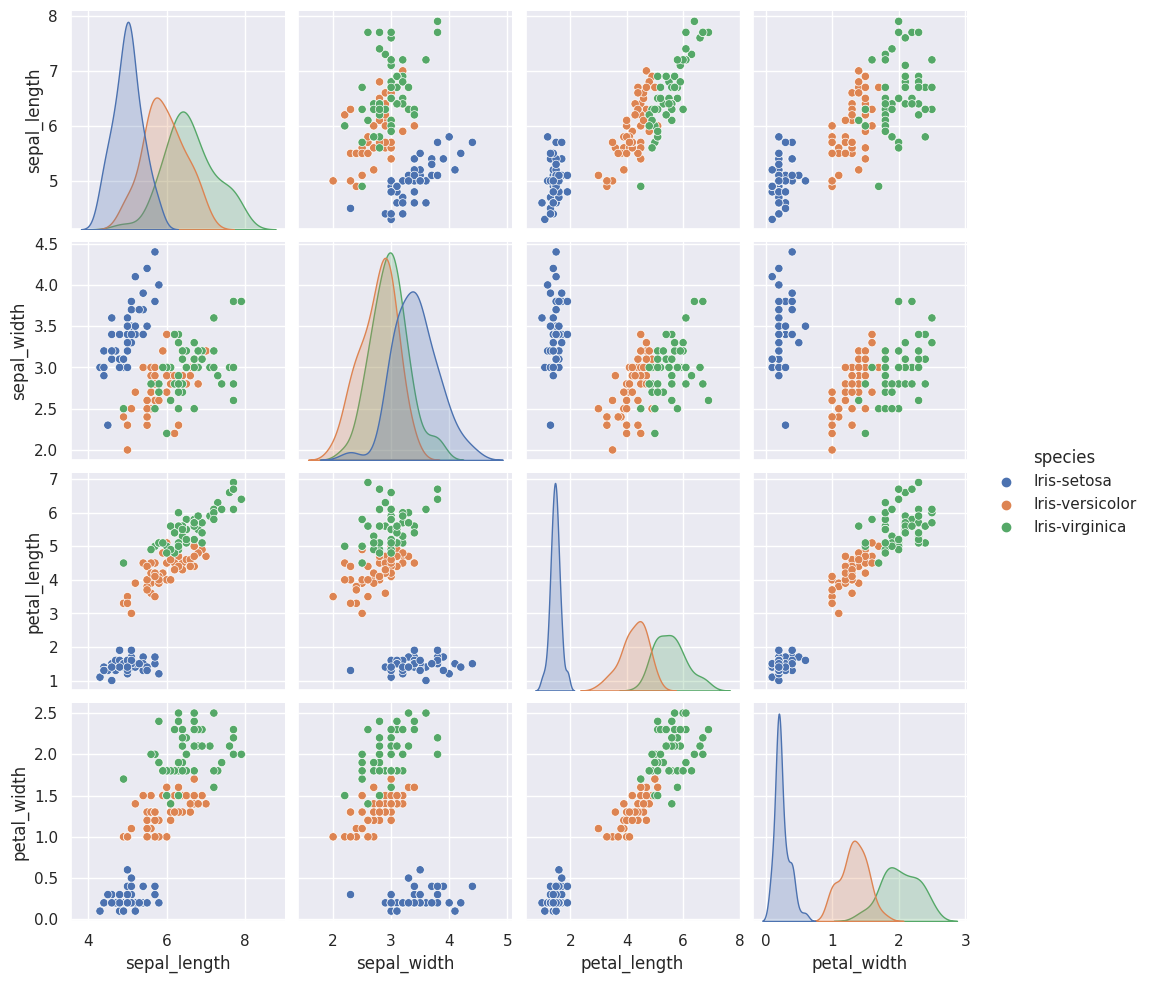

In [9]:
g= sns.pairplot(df,hue="species")

<Axes: >

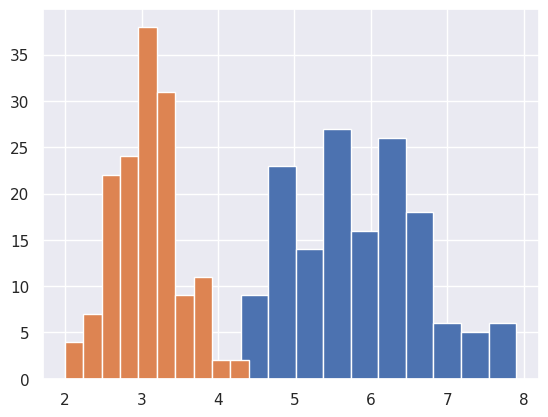

In [10]:
df['sepal_length'].hist()
df['sepal_width'].hist()

<Axes: >

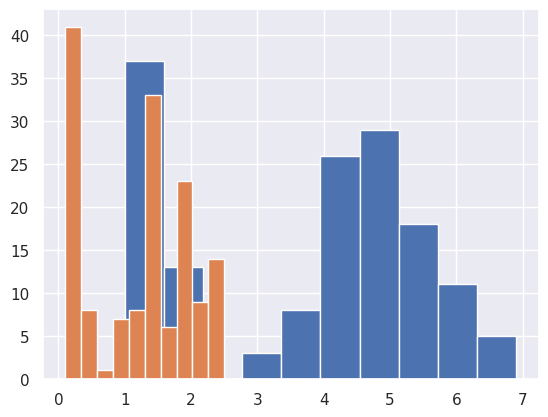

In [11]:
df['petal_length'].hist()
df['petal_width'].hist()

In [12]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [13]:
#encoding the data
data= df[["sepal_length","sepal_width","petal_length","petal_width"]]
labels = LabelEncoder().fit_transform(df.species)
label_names=["setosa","versicolor","virginica"]

In [14]:
len(labels)

150

# **Building Models for Iris Data**

In [15]:
#determinr the target and predictor
X = df.drop(columns = ['species'])
y = df['species']

In [16]:
df_results = pd.DataFrame(columns = ["Predictor/s","R2","MAE","MSE","RMSE","Cross-Val mean"])

In [17]:
#Train and Test split
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=.25,random_state=24)
print("X_train size",x_train.shape)
print("Y_train size",x_test.shape)
print("X_test size",y_train.shape)
print("Y_test size",y_test.shape)

X_train size (37, 4)
Y_train size (113, 4)
X_test size (37,)
Y_test size (113,)


# **Supervised Learning: Classification Model**

# **K-nearst neighbors(KNN) Model**

In [22]:
#First Model K-nearst neighbors(KNN)
#the number of neighborhoods affect performance
nbrs = 3

#first we construct our model
knn = KNeighborsClassifier(n_neighbors=nbrs)

#Now let's train our model
knn.fit(x_train,y_train)

#get predictions on test data
prediction = knn.predict(x_train)

#compute and display accuracy score
score = 100.0 *knn.score(x_test,y_test)
print(f"KNN ({nbrs} neighbors) predicton accuracy = {score:5.1f}% ")


KNN (3 neighbors) predicton accuracy =  95.6% 


# **Supervised Learning: Regression Model**




# **Descion Tree(DT) Model**

In [21]:
#Second Model Decision Tree
#first we construct our model
dtr = DecisionTreeRegressor()

#Now let's train our model
knn.fit(x_train,y_train)

#compute and display accuracy score
score = 100.0 *knn.score(x_test,y_test)
print(f"DT regression accuracy = {score:5.1f}% ")

DT regression accuracy =  95.6% 


# **Unsupervised Learning: Clustering Model**

# **K means**

In [27]:
#first we construct our model
k_means = KMeans(n_clusters=15, random_state=23)

k_means.fit(data)

labels_pred = k_means.labels_
silhouette_avg = silhouette_score(data, labels_pred)
print("Silhouette Score:", silhouette_avg)

score = k_means.inertia_
print("Inertia: ",score)

Silhouette Score: 0.2640453495236877
Inertia:  19.502482683982688
